# Exploratory Data Analysis - Retail

## GRIP @ Sparks Foundation

### Internship Task3: Exploratory Data analysis - Retail

#### Author: Khizer Ahmed Biyabani

Here we are going to perform an exploratory analysis on the given dataset of a retail store.

In [28]:
#importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the data-set
data=pd.read_csv('SampleSuperstore.csv')

In [3]:
#Viewing the first five rows of the data set.
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [10]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

The country is not necessary. So we can drop that column.

In [15]:
data=data.drop(['Country'],axis=1)
data.head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### PRODUCT LEVEL ANALYSIS

In [17]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [18]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [19]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

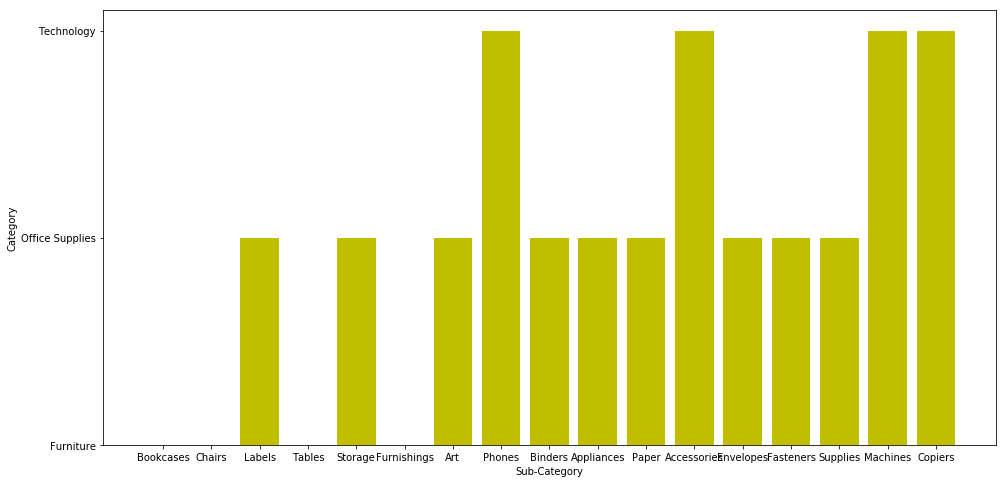

In [23]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=data,color='y')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.show()

Hence, we can find which of the items belong to several categories. And we can infer that maximum products are the office suplies.

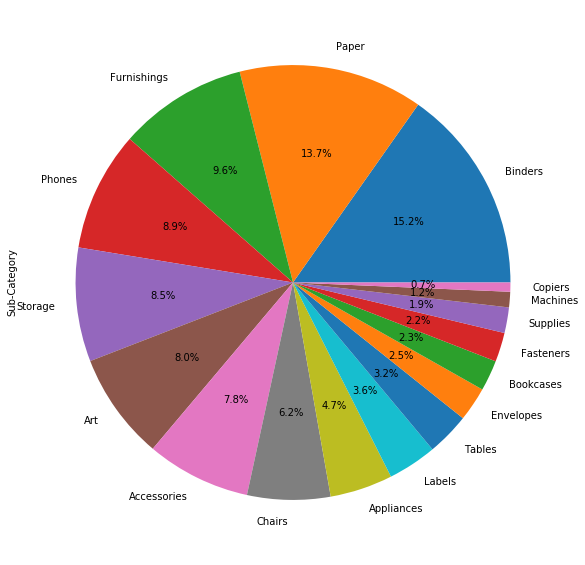

In [24]:
plt.figure(figsize=(12,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The store has wide variety of Office Supplies especially in Binders and Paper department.

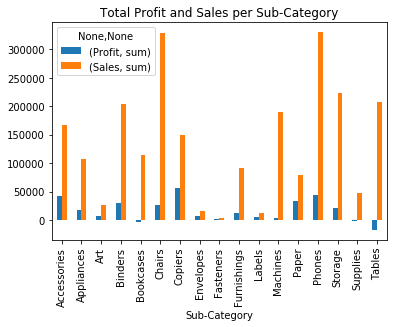

In [26]:
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

Hence, the highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products. Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

In [30]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

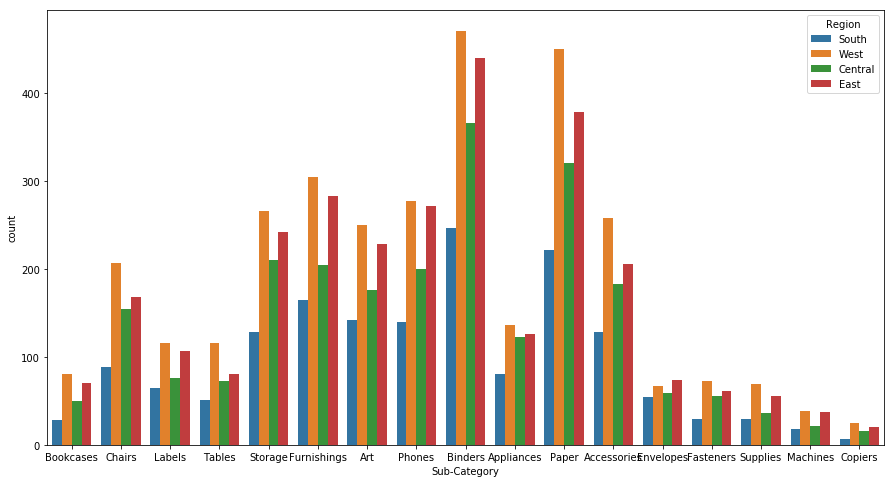

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.show()

People residing in Western part of US tend to order more from superstore.

In [33]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

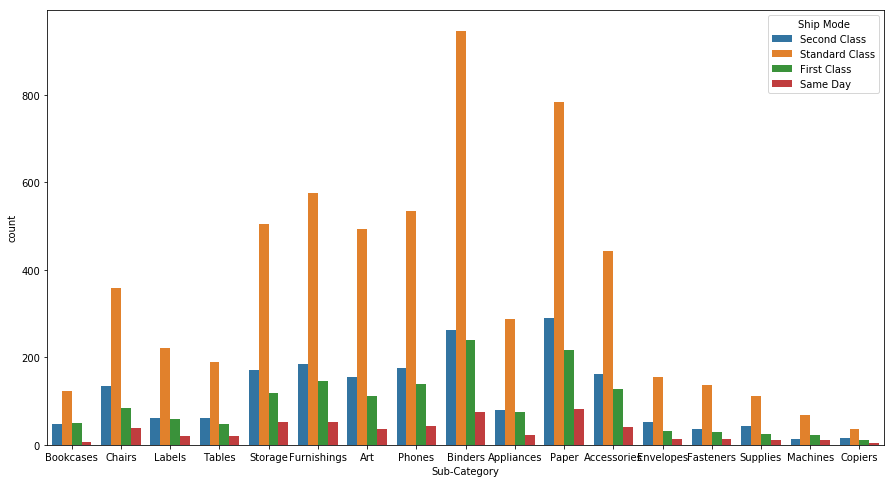

In [34]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Ship Mode", data=data)
plt.show()df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

Hence, we can infer that maximum products of this superstore is shipped in a Standart Class mode. Also, there are less products shipped on the same day.

In [42]:
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056


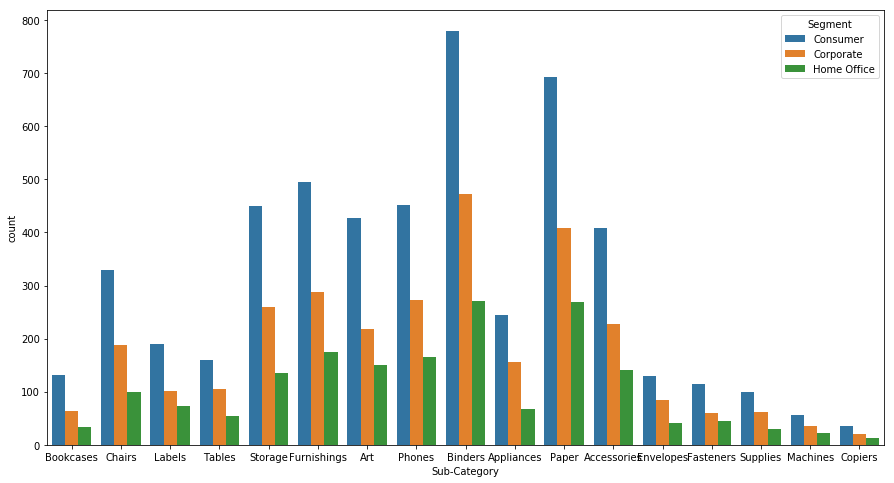

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Segment", data=data)
plt.show()

Hence, the residents if US buy commodities from this superstore.

In [39]:
data['Cost']=data['Sales']-data['Profit']
data['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [41]:
data['Profit %']=(data['Profit']/data['Cost'])*100

In [44]:
#Profit Percentage of first 5 product sub-categories
data.iloc[[0,1,2,3,4],[7,13]]

,Sub-Category,Profit %
0,Bookcases,19.047619
1,Chairs,42.857143
2,Labels,88.679245
3,Tables,-28.571429
4,Storage,12.676056


In [47]:
#Products with high Profit Percentage 
data.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
8422,Standard Class,Consumer,Lakewood,New Jersey,8701,East,Office Supplies,Fasteners,17.900,5,0.0,8.7710,9.1290,96.078431
9336,Standard Class,Corporate,San Francisco,California,94110,West,Office Supplies,Fasteners,17.900,5,0.0,8.7710,9.1290,96.078431
888,Standard Class,Corporate,San Francisco,California,94122,West,Office Supplies,Paper,34.680,6,0.0,16.9932,17.6868,96.078431
1117,Standard Class,Consumer,Roswell,Georgia,30076,South,Office Supplies,Paper,279.900,5,0.0,137.1510,142.7490,96.078431
1990,Standard Class,Consumer,Springfield,Missouri,65807,Central,Office Supplies,Paper,17.340,3,0.0,8.4966,8.8434,96.078431


Hence, phones and paper are sold with a 100% profit in this store.

### CONSUMER LEVEL ANALYSIS

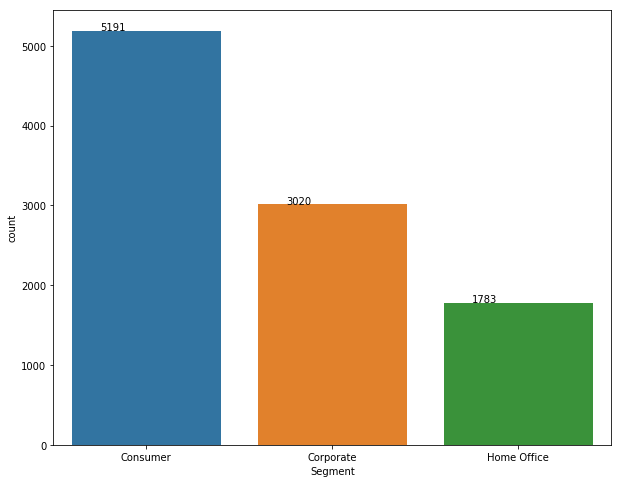

In [48]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = data)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

The distribution is highest in Consumer Segment.

Hence, for improving their sales the store must promote more and more products in the Corporate sector and their home office. Also, they must focus on the loss percentage in the products as we analysed above.


******************************************************* The End ***************************************************************